In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import statsmodels.formula.api as smf

closed_file = 'NBA PROJECTS.csv'
players = pd.read_csv(closed_file)
players = players.loc[(players['Tm'] != 'TOT')& (players['Year'] >= 1990)]

In [2]:
record_file = 'NBA Season Records.csv'
name_file = 'NBA Abbreviations.csv'
records = pd.read_csv(record_file)
names = pd.read_csv(name_file)
#Clean the data in the season column to go from str(2016-17) format to float(2017) format
ssns = []
for year in records['Season']:
    yr = int(year.split('-')[1])
    if ((10 <= yr) & (yr < 20)):
        ssns.append(float('20' + str(yr)))
    elif((0 <= yr) & (yr < 10)):
        ssns.append(float('200' + str(yr)))
    else:
        ssns.append(float('19' + str(yr)))
seasons = pd.Series(ssns)
records['Season'] = seasons
#Truncate the data to only represent seasons from 1989-90 onward (removing 2017-18 as it was not in the other dataframe)
records = records.loc[(records['Season'] >= 1990) & (records['Season'] <= 2017)]
#Remove the * after the team name denoting a playoff presence
records['Team'] = records['Team'].str.replace('*', '')
#Change the names of the teams on the record dataset to the abbreviations on the abbreviation dataset
records['Team'] = records['Team'].map(names.set_index('Team')['Abbreviation'])
#Special condition for "Charlotte Hornets." The name was not used contiguously, so additional conditions were needed
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] >= 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] >= 2015), 'Team'].replace({np.nan:'CHA'})
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] < 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] < 2015), 'Team'].replace({np.nan:'NOP'})
records = records.rename(columns = {'Team':'Tm', 'Season':'Year'})
#Denote whether the team made the playoffs that season
records['Made Playoffs'] = records['Playoffs'].notna()

In [3]:
#Rename some of the team abbreviations to capture recent franchise movement/rename.
players = players.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})

In [4]:
#Merge the season results data with the player data. Season data is duplicated for each player
nba = pd.merge(players, records, on = ['Year', 'Tm'], how = 'left')

Text(0, 0.5, 'Pace (points per game)')

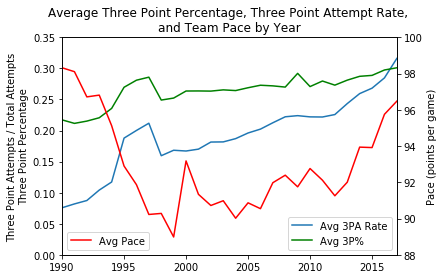

In [5]:
threes_pace = nba.groupby(['Year']).mean()[['3PA','FGA','3P%','Pace']]
attempts_percentage_pace = pd.DataFrame(threes_pace['3PA']/threes_pace['FGA'])
attempts_percentage_pace['Pace'] = threes_pace['Pace']
attempts_percentage_pace['3P%'] = threes_pace['3P%']
fig, x1 = plt.subplots()
x1.plot(attempts_percentage_pace.index, attempts_percentage_pace[0], label = 'Avg 3PA Rate')
x3 = plt.plot(attempts_percentage_pace.index, attempts_percentage_pace['3P%'], color = 'g', label = 'Avg 3P%')
plt.legend(loc = 'lower right')
plt.ylim(0, 0.35)
plt.ylabel('Three Point Attempts / Total Attempts\nThree Point Percentage')
x2 = x1.twinx()
x2 = plt.plot(attempts_percentage_pace.index, attempts_percentage_pace['Pace'], color = 'r', label = 'Avg Pace')
plt.legend(loc = 'lower left')
plt.xlim(1990, 2017)
plt.ylim(88, 100)
plt.title('Average Three Point Percentage, Three Point Attempt Rate, \nand Team Pace by Year')
plt.xlabel('Year')
plt.ylabel('Pace (points per game)')